# Visualizing driver results - Single Camera

In [8]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

In [9]:
BASE_DIR = '/home/romilb/research/msr/results/system_impl/singlecity/'

In [15]:
inference_columns = ["timestamp", "task_id", "chunk_id", "test_acc"]
schedulers = next(os.walk(BASE_DIR))[1]
cities = next(os.walk(os.path.join(BASE_DIR, schedulers[1])))[1]

In [16]:
data = {}
#cities=["zurich"]
for scheduler in schedulers:
    data[scheduler] = {}
    for city in cities:
        inference_csv_path = os.path.join(BASE_DIR, scheduler, city, "inference_0.csv")
        fair_inference_df = pd.read_csv(inference_csv_path, names=inference_columns)
        fair_inference_df['t'] = fair_inference_df["timestamp"] - fair_inference_df["timestamp"].min()
        data[scheduler][city] = fair_inference_df

In [17]:
# Compare mean accuracies
for city in cities:
    fair_acc = data["fair"][city]["test_acc"].mean()
    noretrain_acc = data["noretrain"][city]["test_acc"].mean()
    print("{} Fair acc: {:.2f}. Noretrain acc: {:.2f}".format(city, fair_acc, noretrain_acc))

zurich Fair acc: 0.59. Noretrain acc: 0.61
stuttgart Fair acc: 0.73. Noretrain acc: 0.73
darmstadt Fair acc: 0.61. Noretrain acc: 0.64
dusseldorf Fair acc: 0.84. Noretrain acc: 0.83
monchengladbach Fair acc: 0.77. Noretrain acc: 0.77
aachen Fair acc: 0.74. Noretrain acc: 0.76
tubingen Fair acc: 0.63. Noretrain acc: 0.67
bochum Fair acc: 0.89. Noretrain acc: 0.90
bremen Fair acc: 0.76. Noretrain acc: 0.77
cologne Fair acc: 0.66. Noretrain acc: 0.66
ulm Fair acc: 0.73. Noretrain acc: 0.73
jena Fair acc: 0.61. Noretrain acc: 0.62
strasbourg Fair acc: 0.64. Noretrain acc: 0.66
hamburg Fair acc: 0.55. Noretrain acc: 0.56
krefeld Fair acc: 0.75. Noretrain acc: 0.72
weimar Fair acc: 0.70. Noretrain acc: 0.71
hanover Fair acc: 0.63. Noretrain acc: 0.65
erfurt Fair acc: 0.77. Noretrain acc: 0.78


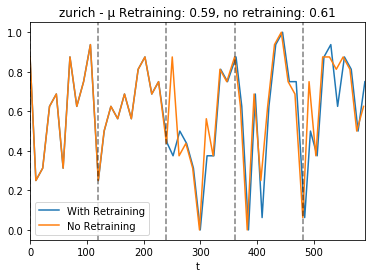

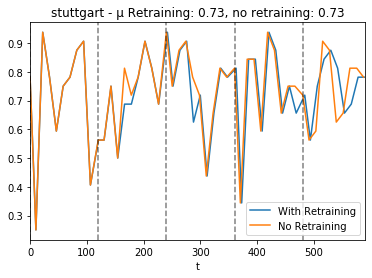

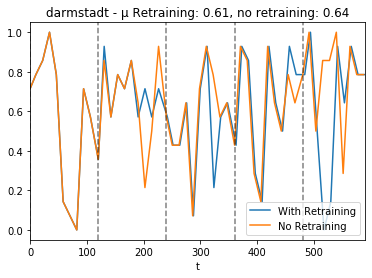

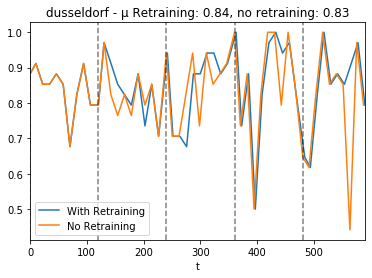

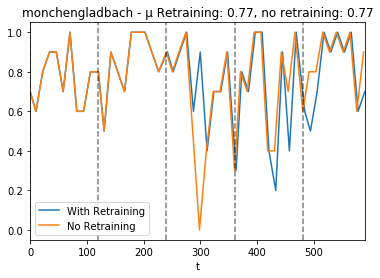

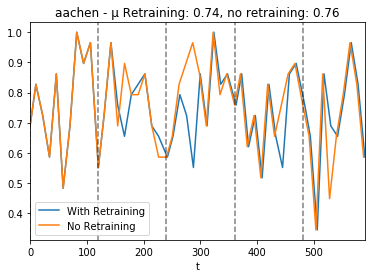

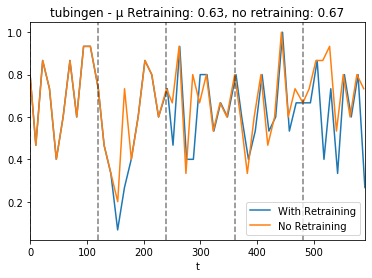

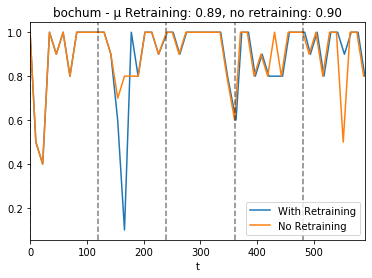

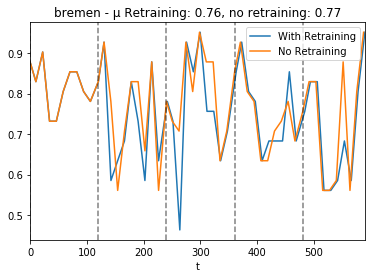

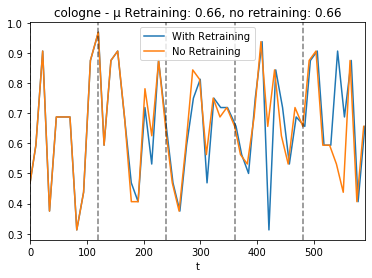

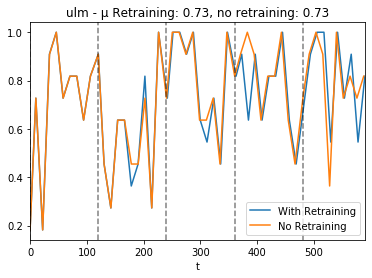

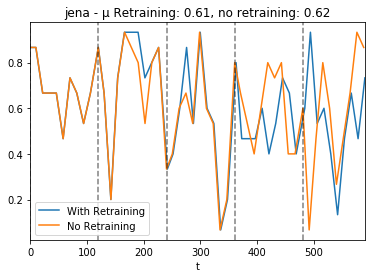

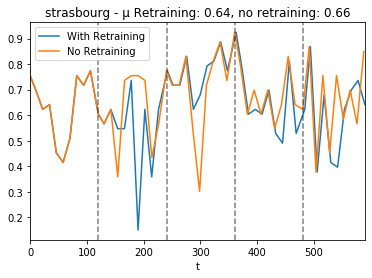

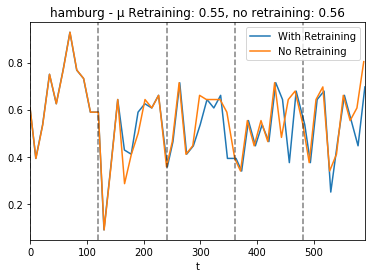

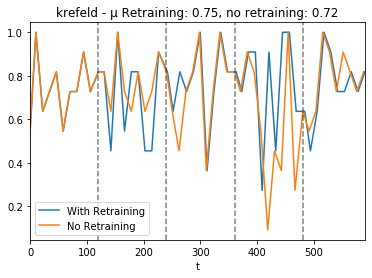

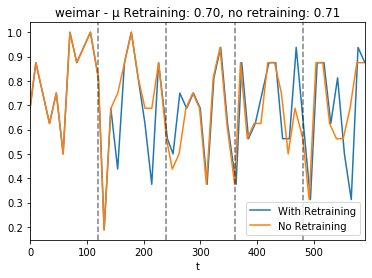

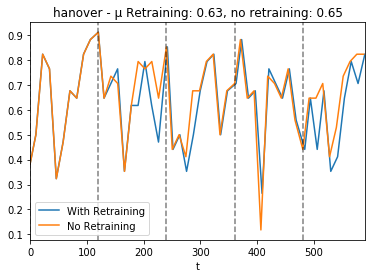

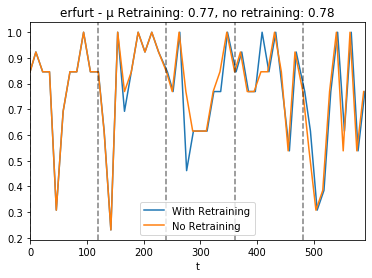

In [32]:
for city in cities:
    plt.figure()
    ax = plt.gca()
    data["fair"][city].plot(x="t", y="test_acc", ax=ax, label="With Retraining")
    data["noretrain"][city].plot(x="t", y="test_acc", ax=ax, label="No Retraining")
    temp_df = data["noretrain"][city]
    window_points = temp_df[temp_df["chunk_id"]==0]["t"]
    for pt in window_points:
        plt.axvline(x=pt, color='black', alpha=0.5, ls='--')
    plt.title("{} - μ Retraining: {:.2f}, no retraining: {:.2f}".format(city, data["fair"][city]["test_acc"].mean(),
                                                                     data["noretrain"][city]["test_acc"].mean()))

<Figure size 432x288 with 0 Axes>

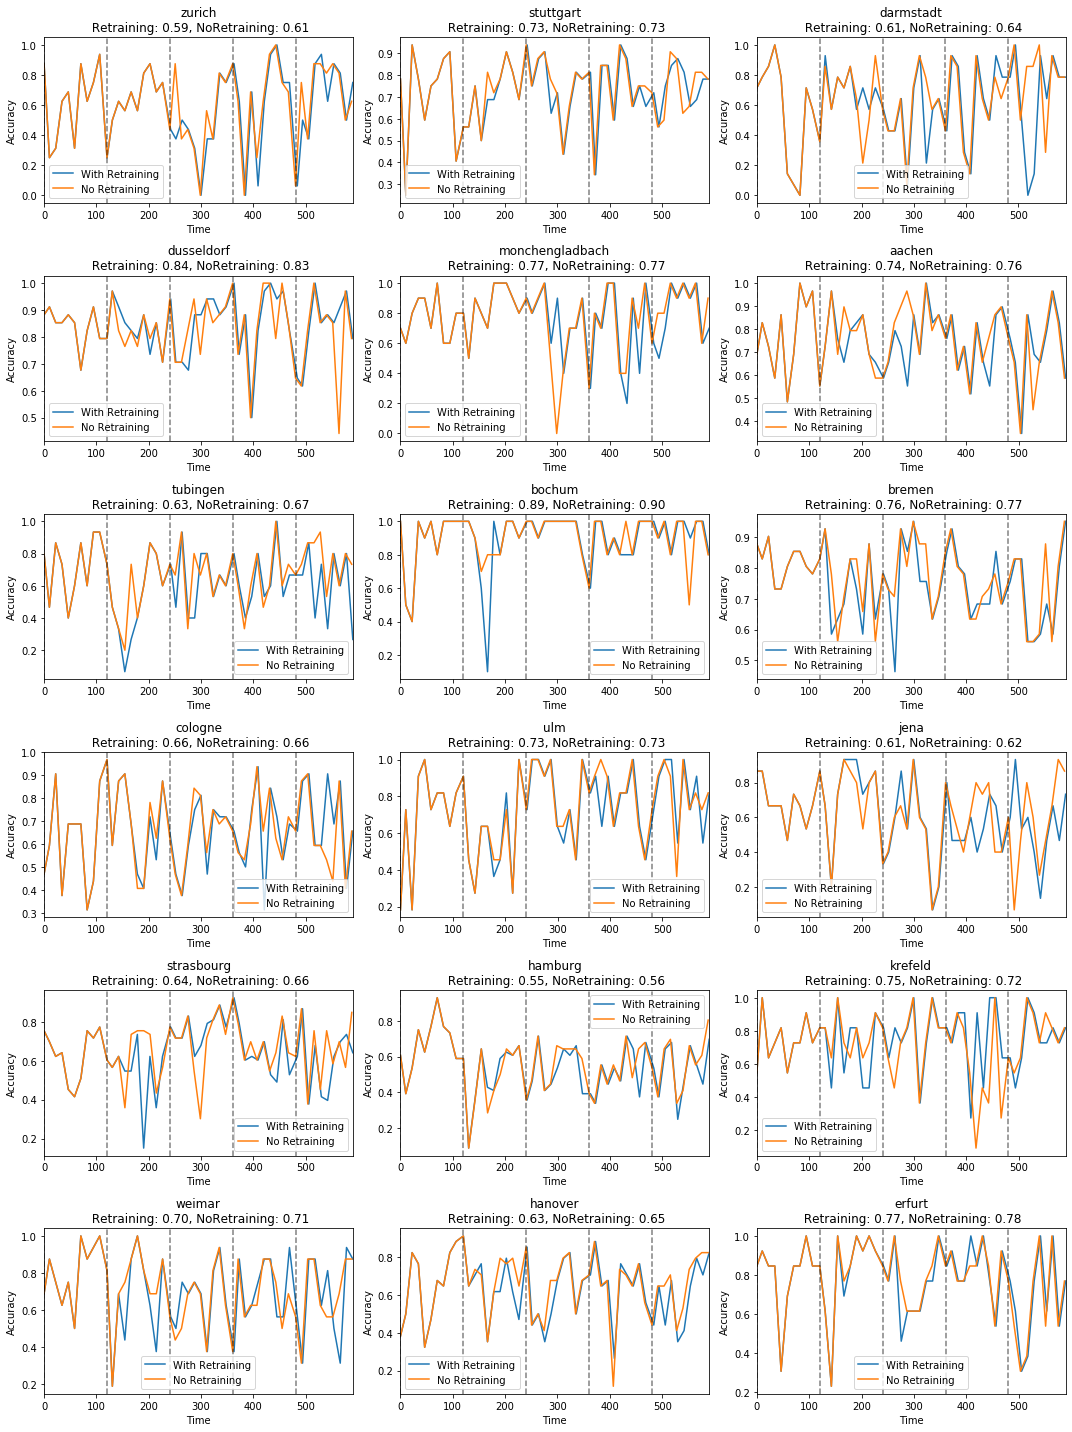

In [48]:
plt.figure()
fig, axs = plt.subplots(figsize=[15,20], nrows=6, ncols=3)

for i, ax in enumerate(axs.reshape(-1)):
    city = cities[i]
    data["fair"][city].plot(x="t", y="test_acc", ax=ax, label="With Retraining")
    data["noretrain"][city].plot(x="t", y="test_acc", ax=ax, label="No Retraining")
    temp_df = data["noretrain"][city]
    window_points = temp_df[temp_df["chunk_id"]==0]["t"]
    for pt in window_points:
        ax.axvline(x=pt, color='black', alpha=0.5, ls='--')
    ax.set_title("{}\n Retraining: {:.2f}, NoRetraining: {:.2f}".format(city, data["fair"][city]["test_acc"].mean(),
                                                                     data["noretrain"][city]["test_acc"].mean()))
    ax.set_xlabel("Time")
    ax.set_ylabel("Accuracy")
plt.tight_layout()
plt.savefig('default_hyperparam.pdf')

In [33]:
len(data["noretrain"])

18